In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df_test2 = pd.read_excel("SMOTE_Borderline_Data.xlsx")
df_test2 = df_test2.loc[:, ~df_test2.columns.str.contains('^Unnamed')]

In [3]:
X = df_test2.drop("EE4_GPA", axis = 'columns')
y = df_test2["EE4_GPA"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
X_train

,EE1,EE2,EE3,MI,IT,PH,ME
388,8.088448,6.509240,6.050014,5.503936,6.217414,8.560949,8.225176
976,8.377546,7.701382,8.305669,6.964364,7.399043,5.992276,7.101914
808,8.056612,4.861539,6.450823,5.540495,4.310401,5.752823,5.648069
273,7.950000,6.858824,5.900000,6.764706,8.150000,9.075000,9.850000
775,9.164605,6.668753,6.849968,7.690418,8.650000,8.948637,6.384661
...,...,...,...,...,...,...,...
519,8.000000,5.966085,4.181281,6.252680,7.000326,8.567811,6.198914
329,8.300000,6.791176,7.817105,6.920588,7.150000,8.425000,5.300000
48,9.700000,6.125000,7.681818,6.295455,6.900000,5.550000,5.900000
891,8.767949,7.480755,9.040031,6.866706,7.158547,8.111218,7.785897


In [6]:
y_train = pd.Series(np.array(y_train))

In [7]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

In [8]:
X_train

,EE1,EE2,EE3,MI,IT,PH,ME
388,8.088448,6.509240,6.050014,5.503936,6.217414,8.560949,8.225176
976,8.377546,7.701382,8.305669,6.964364,7.399043,5.992276,7.101914
808,8.056612,4.861539,6.450823,5.540495,4.310401,5.752823,5.648069
273,7.950000,6.858824,5.900000,6.764706,8.150000,9.075000,9.850000
775,9.164605,6.668753,6.849968,7.690418,8.650000,8.948637,6.384661
...,...,...,...,...,...,...,...
519,8.000000,5.966085,4.181281,6.252680,7.000326,8.567811,6.198914
329,8.300000,6.791176,7.817105,6.920588,7.150000,8.425000,5.300000
48,9.700000,6.125000,7.681818,6.295455,6.900000,5.550000,5.900000
891,8.767949,7.480755,9.040031,6.866706,7.158547,8.111218,7.785897


In [9]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# loading the iris dataset

# dividing X, y into train and test data


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1, probability = True).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions_proba = svm_model_linear.predict_proba(X_test)

# model accuracy for X_test  
SVM_accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [10]:
SVM_accuracy

0.5742971887550201

In [11]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

In [12]:
kfold = KFold(n_splits = 10, random_state=1, shuffle=True)

SVM_score = cross_val_score(svm_model_linear, X, y,scoring = 'accuracy',
                         cv = kfold)

In [13]:
SVM_score.mean()

0.583919191919192

0.8112449799196787


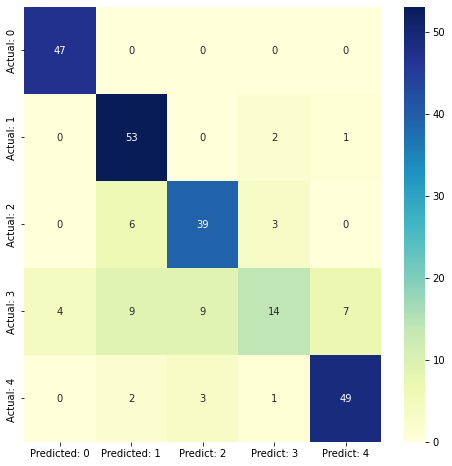

In [14]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
# loading the iris dataset
  
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)
  
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
  
# accuracy on X_test
knn_accuracy = knn.score(X_test, y_test)
print (knn_accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
knn_predictions_proba = knn.predict_proba(X_test) 

cm = confusion_matrix(y_test, knn_predictions)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1', 'Predict: 2', 'Predict: 3', 'Predict: 4'], 
                                    index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4 '])
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu");

In [15]:
knn_score = cross_val_score(knn, X, y,scoring = 'accuracy',
                        cv = kfold)
print(knn_score.mean())

0.780878787878788


In [16]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# loading the iris dataset

# X -> features, y -> label

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_predictions_proba = gnb.predict_proba(X_test)

# accuracy on X_test
GNB_accuracy = gnb.score(X_test, y_test)
print (GNB_accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)


0.5301204819277109


In [17]:
gnb_score = cross_val_score(gnb, X, y,scoring = 'accuracy',
                         cv = kfold)
print(gnb_score.mean())

0.5226464646464646


In [18]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 5, random_state = 20).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_predictions_proba = dtree_model.predict_proba(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


In [19]:
dtree_model_score = cross_val_score(dtree_model, X, y,scoring = 'accuracy',
                        cv = kfold)

dtree_model_score.mean()

0.7006262626262626

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth = 5, random_state = 20).fit(X_train, y_train)

In [22]:
rf_model_predictions_proba = rf_model.predict_proba(X_test)

In [23]:
rf_model.score(X_test, y_test)

0.7469879518072289

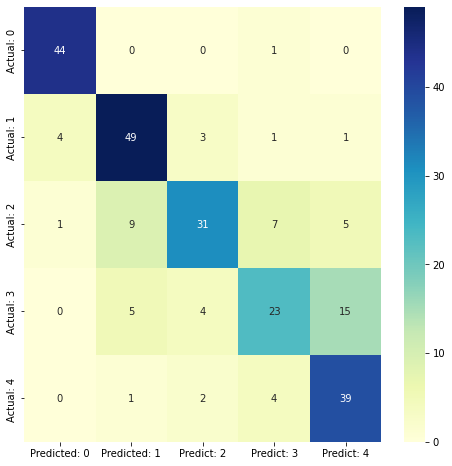

In [24]:
rf_model_predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_model_predictions)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1', 'Predict: 2', 'Predict: 3', 'Predict: 4'], 
                                    index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4 '])
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu");

In [25]:
from sklearn.metrics import log_loss
rf_log_loss = log_loss(y_test, rf_model_predictions_proba)
dt_log_loss = log_loss(y_test, dtree_predictions_proba)
nb_log_loss = log_loss(y_test, gnb_predictions_proba)
knn_log_loss = log_loss(y_test, knn_predictions_proba)
svm_log_loss = log_loss(y_test, svm_predictions_proba)

In [26]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [27]:
rf_scores.mean()

0.737986531986532

In [28]:
score = np.array([knn_score.mean(), SVM_score.mean(), rf_scores.mean(), dtree_model_score.mean(), gnb_score.mean(), 0.77])

In [29]:
score

array([0.78087879, 0.58391919, 0.73798653, 0.70062626, 0.52264646,
       0.77      ])

In [30]:
df = pd.DataFrame({
    'models': ["KNN", "SVM", "RF", "DT", "NB", "ANN"],    
    "accuracy": [knn_score.mean(), SVM_score.mean(), rf_scores.mean(), dtree_model_score.mean(), gnb_score.mean(), 0.77],
    "loss": [knn_log_loss, svm_log_loss, rf_log_loss, dt_log_loss, nb_log_loss, 0.69]
})

In [31]:
df

,models,accuracy,loss
0,KNN,0.780879,22.980941
1,SVM,0.583919,2.424226
2,RF,0.737987,0.820001
3,DT,0.700626,2.157888
4,NB,0.522646,1.164721
5,ANN,0.770000,0.690000


In [32]:
x = df.index
y = df.values

In [33]:
y

array([['KNN', 0.780878787878788, 22.98094142729655],
       ['SVM', 0.583919191919192, 2.4242263716269234],
       ['RF', 0.737986531986532, 0.8200010493760932],
       ['DT', 0.7006262626262626, 2.1578877923053525],
       ['NB', 0.5226464646464646, 1.1647209602664002],
       ['ANN', 0.77, 0.69]], dtype=object)

In [34]:
models = ["KNN", "SVM", "RF", "DT", "NB", "ANN"]
labels = [knn_score.mean(), SVM_score.mean(), rf_scores.mean(), dtree_model_score.mean(), gnb_score.mean(), 0.77]
loss = [knn_log_loss, svm_log_loss, rf_log_loss, dt_log_loss, nb_log_loss, 0.69]

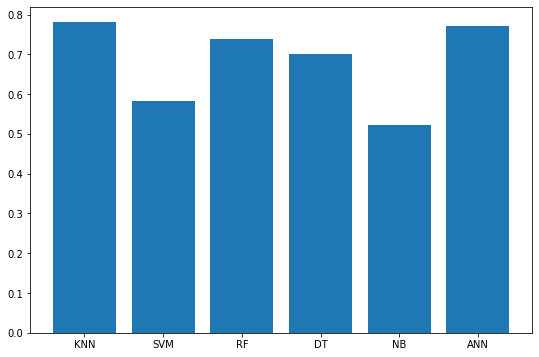

In [35]:
plt.figure(figsize = (9, 6))
plt.bar(x = models, height = labels);


Text(0.5, 1.0, 'Average of Petal Length')

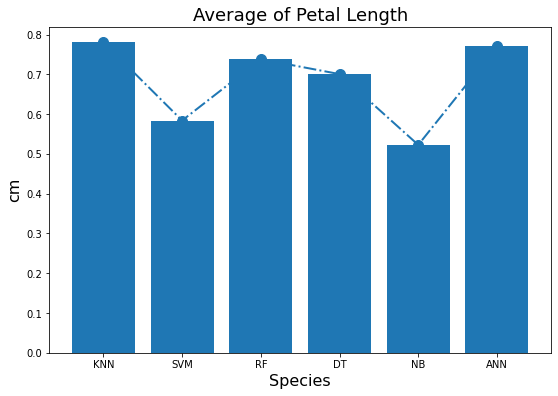

In [36]:
plt.figure(figsize=(9, 6))
plt.bar(x = models, height = labels)
plt.plot(models, labels, marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

In [37]:
scores = np.round(score, 2)
loss = np.round(loss, 2)

Text(0.5, 1.0, "Classification models' Accuracy")

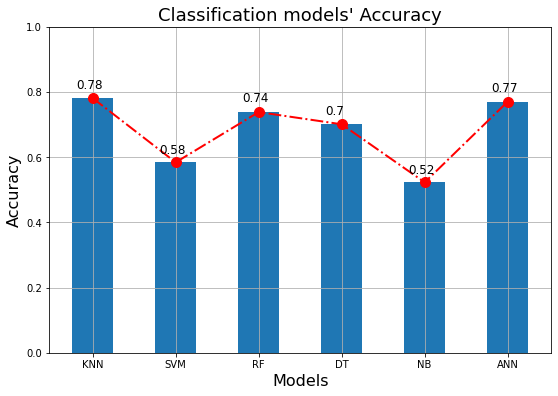

In [38]:
plt.figure(figsize=(9, 6))
plt.bar(x = models, height = labels, width = 0.5)
plt.ylim(0, 1)
plt.grid()
xlocs, xlabs = plt.xticks()
for i, v in enumerate(scores):
    plt.text(xlocs[i] - 0.2, v + 0.03, str(v), fontdict=dict(fontsize = 12))

plt.plot(models, labels, marker='o', markersize=10, linestyle='-.', linewidth=2, color = "red")
plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title("Classification models' Accuracy", fontsize=18)

Text(0.5, 1.0, "Classification models' Accuracy")

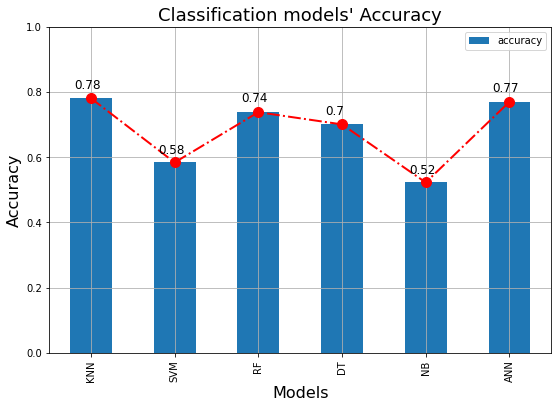

In [39]:
ax = df.plot(x="models", y="accuracy", kind="bar", figsize=(9, 6))
plt.ylim(0, 1)
plt.grid()
xlocs, xlabs = plt.xticks()
for i, v in enumerate(scores):
    plt.text(xlocs[i] - 0.2, v + 0.03, str(v), fontdict=dict(fontsize = 12))

plt.plot(models, labels, marker='o', markersize=10, linestyle='-.', linewidth=2, color = "red")
plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title("Classification models' Accuracy", fontsize=18)


Text(0.5, 1.0, "Classification models' Loss")

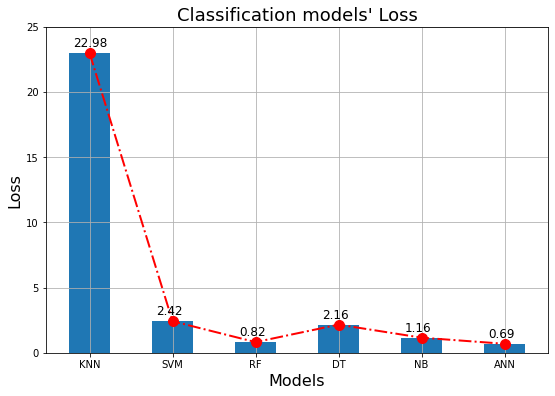

In [40]:
plt.figure(figsize=(9, 6))
plt.bar(x = models, height = loss, width = 0.5)
plt.ylim(0, 25)
plt.grid()
xlocs, xlabs = plt.xticks()

for i, v in enumerate(loss):
    plt.text(xlocs[i] - 0.2, v + 0.5, str(v), fontdict=dict(fontsize = 12))

plt.plot(models, loss, marker='o', markersize=10, linestyle='-.', linewidth=2, color = "red")
plt.xlabel('Models', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title("Classification models' Loss", fontsize=18)